In [1]:
%matplotlib inline
import networkx as nx
import readwrite_gml
kn = readwrite_gml.read_gml('weighted_karate.gml')

In [2]:
type(kn)

networkx.classes.graph.Graph

In [3]:
kn.edges()

EdgeView([(1, 12), (1, 6), (1, 11), (1, 14), (1, 3), (1, 2), (1, 5), (1, 18), (1, 4), (1, 7), (1, 20), (1, 32), (1, 9), (1, 22), (1, 8), (1, 13), (2, 22), (2, 3), (2, 8), (2, 14), (2, 31), (2, 18), (2, 20), (2, 4), (3, 33), (3, 9), (3, 28), (3, 10), (3, 8), (3, 14), (3, 29), (3, 4), (4, 14), (4, 13), (4, 8), (5, 11), (5, 7), (6, 7), (6, 17), (6, 11), (7, 17), (9, 33), (9, 34), (9, 31), (10, 34), (14, 34), (15, 34), (15, 33), (16, 34), (16, 33), (19, 34), (19, 33), (20, 34), (21, 34), (21, 33), (23, 33), (23, 34), (24, 30), (24, 33), (24, 26), (24, 28), (24, 34), (25, 26), (25, 32), (25, 28), (26, 32), (27, 34), (27, 30), (28, 34), (29, 34), (29, 32), (30, 33), (30, 34), (31, 34), (31, 33), (32, 34), (32, 33), (33, 34)])

In [4]:
# Sort the edge list by weight
#x = kn.get_edge_data(0,1)
#print x, x[0]
all_edges = sorted(kn.edges(), 
                   key= lambda x: kn.get_edge_data(*x)['attr_dict']['value'], 
                   reverse=True)
#for (s,e) in kn.edges():
#    print s, e
#    print kn.get_edge_data(s,e)[s]['value']
#for (s,e) in kn.edges():
#    print kn.get_edge_data(s,e)
# The next line shows the first edge (highest weighted) in the edgelist
print (list(kn.edges())[0])
# Next we print the attributes of that edge
kn.get_edge_data(1,12)

(1, 12)


{'attr_dict': {'value': 3.0}}

In [5]:
for e in all_edges[:10]:
    print('{0:>2} {1:>2}   {2}'.format(e[0], e[1], kn.edges[e]['attr_dict']['value']))

26 32   7.0
 2  3   6.0
 1  3   5.0
 2 14   5.0
 3  9   5.0
 6  7   5.0
24 33   5.0
24 26   5.0
33 34   5.0
 1  2   4.0


In [6]:
list(kn.edges(data=True))[:10]

[(1, 12, {'attr_dict': {'value': 3.0}}),
 (1, 6, {'attr_dict': {'value': 3.0}}),
 (1, 11, {'attr_dict': {'value': 2.0}}),
 (1, 14, {'attr_dict': {'value': 3.0}}),
 (1, 3, {'attr_dict': {'value': 5.0}}),
 (1, 2, {'attr_dict': {'value': 4.0}}),
 (1, 5, {'attr_dict': {'value': 3.0}}),
 (1, 18, {'attr_dict': {'value': 2.0}}),
 (1, 4, {'attr_dict': {'value': 3.0}}),
 (1, 7, {'attr_dict': {'value': 3.0}})]

In [7]:
kn0 = nx.karate_club_graph()
# Copy the node attribute info (esp. the "club" info) from the nx version `kn0`,
# But be careful about leaving the nx version unchanged.
new_kn = nx.Graph()
for (n, nd)in kn0.nodes(data=True):
    new_kn.add_node(n,attr_dict = nd)
    #new_kn.nodes[n] = kn0.nodes[n]
kn0_edges = kn0.edges()
for (s,e,ed) in kn.edges(data=True):
    new_kn.add_edge(s-1,e-1, weight=ed['attr_dict']['value'])
    if not (s-1,e-1) in kn0_edges:
        raise(Exception, '{0} {1}'. format(s,e))

In [8]:

readwrite_gml.write_gml(new_kn, 'new_weighted_karate.gml')

In [9]:
new_kn.nodes[list(kn0.nodes)[0]]

{'attr_dict': {'club': 'Mr. Hi'}}

In [10]:
kn_nl, kn0_nl = (list(kn.nodes), list(kn0.nodes))
print(len(kn), kn_nl, type(kn_nl[0]))
print(len(kn0), kn0_nl, type(kn0_nl[0]))
print(len(new_kn), new_kn.nodes(), type(new_kn.nodes()[0]))

34 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34] <class 'int'>
34 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33] <class 'int'>
34 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33] <class 'dict'>


In [11]:
# Now for each edge we print the edge and its weight 
# (normalized num scenes with that edge pair)
from collections import Counter
for (u, v, attr_dict) in list(new_kn.edges(data=True))[:10]:
    weight = attr_dict['weight']
    print ('%-4s %-4s %.3f' % (u, v, weight))

0    11   3.000
0    5    3.000
0    10   2.000
0    13   3.000
0    2    5.000
0    1    4.000
0    4    3.000
0    17   2.000
0    3    3.000
0    6    3.000


In [12]:
all_nodes_il = sorted(new_kn.degree, 
                      key = lambda x:x[1], reverse=True)
top_chars_degree_centrality = all_nodes_il[:12]
print()
for (ch, ct) in top_chars_degree_centrality:
    print('%4s %.3f' % (ch, ct, ))


  33 17.000
   0 16.000
  32 12.000
   2 10.000
   1 9.000
   3 6.000
  31 6.000
   8 5.000
  13 5.000
  23 5.000
   5 4.000
   6 4.000


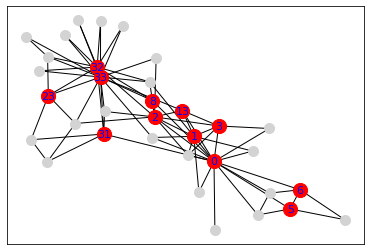

In [14]:
new_labels_kn = dict([(char,char) for (char,score) in top_chars_degree_centrality])

#pos = nx.spring_layout(kn,scale=1.0) # The default scale is 1.0
#pos = nx.spring_layout(kn,scale=.75) 
# Try tweaking the scale and adjusting node positions.

# Try increasing spring tension (scale) for high weighted edges

pos = nx.spring_layout(new_kn,scale=1.0,weight='value') 
# Default node size=300
nx.draw_networkx(new_kn,pos, with_labels=False,node_size=100,node_color="lightgray")  

nx.draw_networkx_labels(new_kn,pos,new_labels_kn,font_size=11,font_color='blue')
nx.draw_networkx_nodes(new_kn,pos,new_labels_kn,node_color='red',
                       node_size=200,label_pos=1.0,node_shape='o',font_size=16)
#nx.draw_networkx_nodes(kn,pos,new_labels_kn,node_color='red',node_shape='p')

In [15]:
M_kn = nx.betweenness_centrality(new_kn)
il_kn = list(M_kn.items())
il_kn.sort(key=lambda x:x[1],reverse=True)
kn_top_chars_betweenness_dict = dict(il_kn[:10])
for (ch,score) in il_kn[:10]:
    print('%5s  %.3f' % (ch, score))

    0  0.438
   33  0.304
   32  0.145
    2  0.144
   31  0.138
    8  0.056
    1  0.054
   13  0.046
   19  0.032
    5  0.030


# Different ways of defining color sequences

In [ ]:
#partition_cols = ['#00CCFF','#FF0033','#886633', '#336633']
#partition_cols = ['red','cyan','blue', 'green']
#partition_cols = 'rcbg'

If we have a `partition` of the nodes, a function assigning a class (or community) to each node, we can proceed as follows to define colors for each node

In [16]:
from itertools import cycle

# Let's pick 4 colors for 4 communities
partition_colors = ['red','cyan','blue', 'green']
communities = 'abcd'
# Assign a color to each community
color_map = dict(zip(communities, partition_colors))

# Assign communities to every node in a set of nodes 
#(we'll use an algorithm to do this later)
nodelist = range(12)
# Assign nodes 0,4,8 to community 'a'; assign 1,5,9 to community 'b', and so on.
partition = dict(zip(nodelist,cycle(communities)))

# Make a list of colors, node_colors, 
#where node_colors[i] returns the color of node[i]
node_colors = [color_map[partition[n]] for n in nodelist]


What this code does:

In [19]:
print(color_map)
print(partition)
print()
for n in nodelist:
    print('{0:<5} '.format(n), end=' ')
print()
for c in node_colors:
    print('{0:<5} '.format(c), end=' ')
print()

{'a': 'red', 'b': 'cyan', 'c': 'blue', 'd': 'green'}
{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'a', 5: 'b', 6: 'c', 7: 'd', 8: 'a', 9: 'b', 10: 'c', 11: 'd'}

0      1      2      3      4      5      6      7      8      9      10     11     
red    cyan   blue   green  red    cyan   blue   green  red    cyan   blue   green  


# Community Discovery

Community discovery.  The following code uses the Louvain method described in  Vincent D Blondel, Jean-Loup Guillaume, Renaud Lambiotte, Renaud Lefebvre. 2008. *Fast unfolding of communities in large networks*. Journal of Statistical Mechanics: Theory and Experiment Vol. 10. P10008 (12pp).  This method chooses communities and also decides on its own how many communities there are.  

In [18]:
#import louvain
import networkx as nx
import matplotlib.pyplot as plt
from itertools import cycle

def get_partition_coloring (nodes, partition_dict):
    colors = cycle('bgrcmyk')
    partitions = set(partition_dict.values())
    color_map = dict(zip(partitions, colors))

    return [color_map[partition_dict[n]] for n in nodes]

We call the community discovery algorithm as follows.  It returns a dictionary a community to each node.  The number of communities discovered is determined by internal properties of the graph.  We're going to draw a graph which colors each node differently based on what community it;s been assigned to.

In [19]:
        
##########################################################
#   Community    Discovery
##########################################################
#from networkx.algorithms.community import modularity_max
#from networkx.algorithms.community import label_propagation_communities
#from networkx.algorithms.community import girvan_newman
import louvain
#new_kn = nx.karate_club_graph()
partition_dict = louvain.best_partition(new_kn)
size = len(set(partition_dict.values()))
print ('{0:d} communities were discovered!'.format(size))


4 communities were discovered!


Choose colors.

In [20]:
##########################################################
#   Drawing using the communities discovered by louvain
##########################################################


# Colors for what the community detection algorithm detects
nodes = new_kn.nodes()
louvain_colors = get_partition_coloring (list(nodes), partition_dict)


# Colors for what the truth is
# make a partitioning of the graph from the node dictionary "club" attribute,
# which represents Zachary's conclusion about which faction each club member joined.

node_dict = dict(nodes(data=True))
zach_partition  = dict((n, 0 if node_dict[n]['attr_dict']['club'] == 'Officer' 
                        else 1) for n in nodes)
zach_colors = get_partition_coloring (list(nodes),zach_partition)

Draw two plots of same graph and same layout but different coloring.

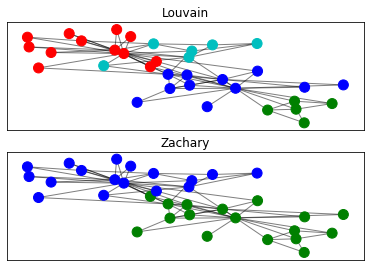

In [21]:
# Get layout, axes for two drawings
pos = nx.spring_layout(new_kn)
count = 0.
fig, (ax1,ax2) = plt.subplots(2)

# set current axis and draw nodes with louvain colors
plt.sca(ax1)
ax1.set_title('Louvain')
nx.draw_networkx_nodes(new_kn, pos, list(new_kn.nodes()), node_size = 100,
                       node_color = louvain_colors)
# Now edges
nx.draw_networkx_edges(new_kn, pos, alpha=0.5, )

##########################################################
#   Drawing using the communities defined by Zachary
##########################################################


plt.sca(ax2)
ax2.set_title('Zachary')
nx.draw_networkx_nodes(new_kn, pos, new_kn.nodes(), 
                       node_size = 100, node_color = zach_colors)
nx.draw_networkx_edges(new_kn,pos, alpha=0.5, )
#plt.show()

We see that Louvain has failed to replicate Zachary's communities in two ways.  First Louvain has **more** communities. Second, it hasn't just split
true Zachary communities into sub-communities.
Consider Zachary's blue community.  Largely, Louvain has split that
into red and cyan, but Louvain's red community also includes one member
from Zachary's green community.


# Inside louvain

In [56]:
import louvain
kn = nx.karate_club_graph()
dendo = louvain.generate_dendogram(kn)
partition = louvain.partition_at_level(dendo, len(dendo) - 1 )

In [57]:
dendo

[{0: 0,
  1: 0,
  2: 1,
  3: 1,
  4: 2,
  5: 3,
  6: 3,
  7: 1,
  8: 4,
  9: 1,
  10: 2,
  11: 0,
  12: 1,
  13: 1,
  14: 4,
  15: 4,
  16: 3,
  17: 0,
  18: 4,
  19: 0,
  20: 4,
  21: 0,
  22: 4,
  23: 5,
  24: 5,
  25: 5,
  26: 4,
  27: 5,
  28: 5,
  29: 4,
  30: 4,
  31: 5,
  32: 4,
  33: 4},
 {0: 0, 1: 0, 2: 1, 3: 1, 4: 2, 5: 3}]

In [11]:
len(dendo)

2